# DAT550-2021 Final Project

## Overview

Musical Sheet/Tab Generator	

### Description:

Create neural network capable of "listening to music waveforms" and generate sheet musical notation equivalent in "abc" language.

#### Expected results:
- Train a deep neural network model able to provide given outputs from music waveforms with good accuracy

#### Goal:
To go from music waveforms to  abc format such as in https://piano2notes.com/file/7747aefc-c516-47b3-abdb-dbcda1649a65 (Does not generate abc but  music sheet)
Dataset:
http://theremin.music.uiowa.edu/MISpiano.html


### Utilities:
https://github.com/attejensen/abctool
https://github.com/g4brielvs/python-tomita

## Algorithms
- Spectrogram
- MFCC Spectrogram
    https://en.wikipedia.org/wiki/Mel-frequency_cepstrum#:~:text=From%20Wikipedia%2C%20the%20free%20encyclopedia,nonlinear%20mel%20scale%20of%20frequency.

## Python audio Libraries
- https://mido.readthedocs.io/en/latest/
- https://wiki.python.org/moin/PythonInMusic

## Tutorials
https://github.com/tensorflow/docs/tree/master/site/en/



## Candidate datasets
- https://www.kaggle.com/arshadgeek/piano-notes-transcription
- https://www.kaggle.com/juliancienfuegos/what-is-a-note
- https://www.kaggle.com/soumikrakshit/classical-music-midi
- https://magenta.tensorflow.org/datasets/maestro#v300

### MIDI FIle format specification
https://github.com/colxi/midi-parser-js/wiki/MIDI-File-Format-Specifications

## Kaggle Repository
https://www.kaggle.com/asahicantu/dat550-2021-final-project/

## Tasks
[] Try different preprocessing techniques and find out its differences



0. Transform Audio MIDI Files into waveforms
1. Iterate over best features to extract and process
2. Candidate algorithms to use
   1. Given an audio sample dataset, split a file into smaller time chunks
   2. Fourier transformation
   3. Frequency over time diagram
4. [] Get Audio Files Data
   1. Creating them  or get dataset
   2. 
5. [] Create feature extraction mechanism
6. [] 

 



In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Preprocessing

### Midi to note

In [3]:
import librosa

midi_file = librosa.load('../data/split_midi/song1._6.mid')
print(midi_file)
librosa.midi_to_note(midi_file, octave=True, cents=False, key='C:maj', unicode=True)[0][0]

c:\development\software\python 3.8.1\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        1.5236128e-09, -1.1298138e-09,  7.9938972e-10], dtype=float32), 22050)


'C-1'

### Pretty midi

**load data in prettyMidi format**

In [4]:
# https://craffel.github.io/pretty-midi/
import pretty_midi
# Load MIDI file into PrettyMIDI object
midi_data = pretty_midi.PrettyMIDI('../data/split_midi/song1._6.mid')
# Print an empirical estimate of its global tempo
#print(midi_data.estimate_tempo()) # works only for more than one note

**synthesize**

In [5]:
# Synthesize the resulting MIDI data using sine waves
sine_synth = midi_data.synthesize()

**visualize**

128 13 (128, 13)


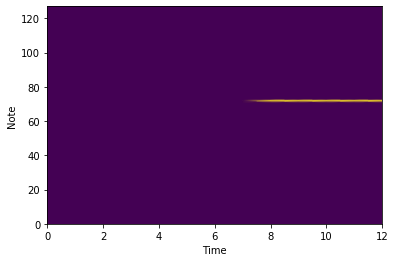

In [6]:
piano_roll = midi_data.get_piano_roll()

import matplotlib.pyplot as plt
print(np.array(piano_roll).shape[0], np.array(piano_roll).shape[1], piano_roll.shape)
plt.pcolormesh(np.arange(piano_roll.shape[1]), np.arange(piano_roll.shape[0]), piano_roll, shading='gouraud')
plt.ylabel('Note')
plt.xlabel('Time')
plt.show()

**save**

In [7]:
midi_data.write("example_output.mid")

### Midi to Wav

In [8]:
# could be done with this library, but gives me an error
# https://github.com/bzamecnik/midi2audio

#from midi2audio import FluidSynth
#soundfont = 'C:\\development\\repos\\Uni\\dat550-2021\\DeepWhiners\\198_Yamaha_SY1_piano.sf2'

#filepath = 'C:\\development\\repos\\Uni\\dat550-2021\\DeepWhiners\\input.mid'

#fs = FluidSynth(sound_font=soundfont)

#fs.midi_to_audio(filepath, 'output.wav')


### Spectograms

In [43]:
from pydub import AudioSegment

wave_file = 'example.wav'
wave = AudioSegment.from_wav(wave_file)
from_30s_to_60s = wave[30000:60000]
raw = np.array(from_30s_to_60s.get_array_of_samples())

In [44]:
from_30s_to_60s

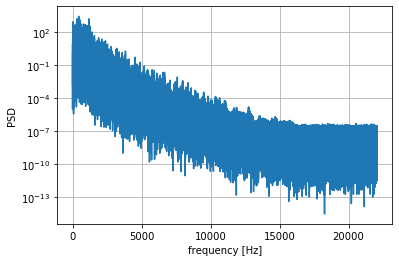

In [55]:
# From scipy.signal.spectrogram docs
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

samplingFrequency, signalData = wavfile.read('example.wav')
f, Pper_spec = signal.periodogram(signalData[:,0], samplingFrequency, 'flattop', scaling='spectrum')

plt.semilogy(f, Pper_spec)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.grid()
plt.show()

c:\development\software\python 3.8.1\lib\site-packages\librosa\filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

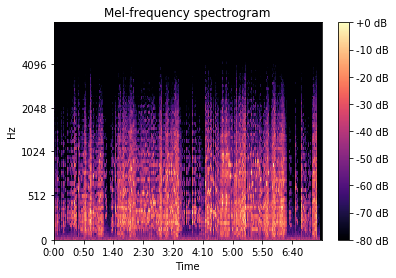

In [150]:
#https://librosa.org/doc/latest/generated/librosa.feature.melspectrogram.html
import librosa.display
y, sr = librosa.load('example.wav')
librosa.feature.melspectrogram(y=y, sr=sr)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=22050)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

c:\development\software\python 3.8.1\lib\site-packages\matplotlib\axes\_axes.py:7747: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


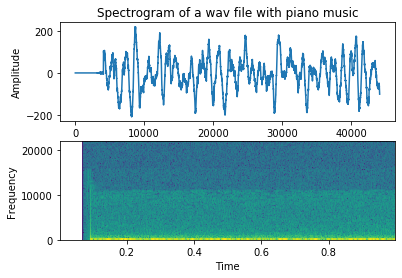

In [139]:
# https://pythontic.com/visualization/signals/spectrogram
#import the pyplot and wavfile modules 

import matplotlib.pyplot as plot

from scipy.io import wavfile

# Read the wav file (mono)
samplingFrequency, signalData = wavfile.read('example.wav')

# Plot the signal read from wav file
plot.subplot(211)
plot.title('Spectrogram of a wav file with piano music')

plot.plot(signalData[:, 0][:44100])
plot.xlabel('Sample')
plot.ylabel('Amplitude')


plot.subplot(212)
Spec, f, t, img = plot.specgram(signalData[:, 0][:44100],Fs=samplingFrequency) # plot one channel, first second
plot.xlabel('Time')
plot.ylabel('Frequency')
plot.show()

# Postprocessing
### e.g. abc-notation to sheet music conversion